# Simulación numérica| Péndulo doble

[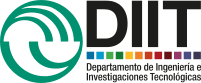](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado 
En el siguiente problema resolverá numericamente cada ecuación de Euler-Lagrange que corresponda a cada coordenada generalizada.
Graficando tales soluciones, en el rango de tiempos y con las condiciones iniciales indicadas, estará simulando la dinámica de tales sistemas.  
La aceleracion gravitatoria tiene por magnitud \\(|\vec{g}| = 9.81\,\mathrm{m s^{-2}}\\).

> Ejercicio 1 sección 5 ($\S$ 5) en  
Lev Davidovich Landau, y E. M. Lifshitz. Mecánica. 2.a. Curso de física teórica. Reverté, 1994.

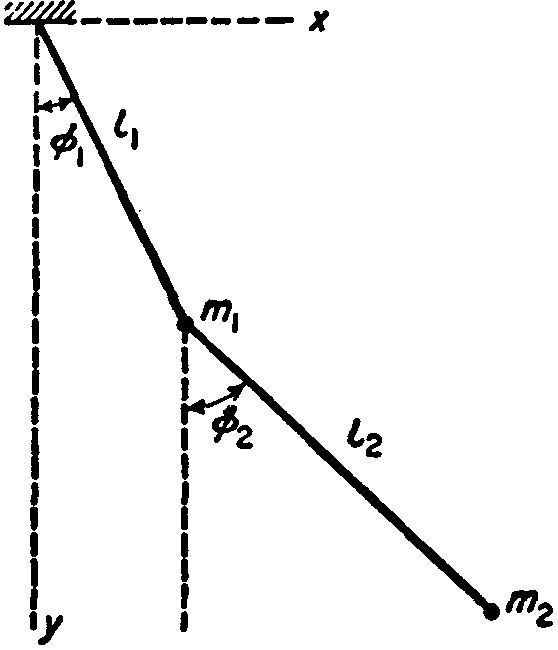

### Parámetros de simulación
Rango de tiempo \\(t = 0 - 10\,\mathrm{s}\\).  
Parámetros físicos y condiciones iniciales:  
$m_1 = 3\,\mathrm{kg}$, $m_2 = 1\,\mathrm{kg}$,
$\ell_1 = 2\,\mathrm{m}$, $\ell_2 = 1\,\mathrm{m}$,   
$\phi_1 (t=0) = \frac{\pi}{8}$, $\dot{\phi}_1 (t=0) = 0$, 
$\phi_2 (t=0) = \frac{\pi}{4}$, $\dot{\phi}_2 (t=0) = -\frac{\pi}{16}\,\mathrm{s^{-1}}$.

## Resolución

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

### Variables

In [2]:
# Defino los parámetros físicos del sistema
m1, m2, g, l1, l2 = sym.symbols('m_1, m_2, g, l_1, l_2', positive=True)

# Defino coordenadas generalizadas 
phi1, phi2 = mech.dynamicsymbols(r'\varphi_1,\varphi_2') # variables que cambiaran con el tiempo, por tanto son variables dinámicas
# el r es para que el sistema considere el backslash \ como string

### Energía cinética

In [4]:
# Sistema cartesiano
e = sym.physics.vector.ReferenceFrame('e') # marco referencial N en coordenadas cartesianas

# posiciones
m1_r = l1* (sym.cos(phi1)* (e.y) + sym.sin(phi1)* (e.x)) # recordemos que tomamos y hacia arriba
m2_r = m1_r + l2* (sym.cos(phi2)* (e.y) + sym.sin(phi2)* (e.x)) # recordemos que tomamos y hacia arriba

In [5]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Multiplicación de símbolos Sympy (sympy.core.mul.Mul)
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    # velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

In [6]:
# Energía cinética del sistema
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m2 = energíaCinéticaPartícula(m2, m2_r, e)
T = sym.Eq(sym.Symbol('T'), T_m1 + T_m2 ).simplify()
# sym.Eq(lado iz, lado derecho)
# simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial

Como vimos, estableciendo la usual $V(y_0=0)=0$ nos queda
$$
V_i= m_i g y_i.
$$

Solo nos ocupa tener la componente en $\hat{y}$ de la pesa de $m_2$.
Esto se obtiene de multiplicar (producto punto) su posición $\vec{r}_2$ con el versor $\hat{y}$.

In [13]:
# Energía potencial
m1_V = m1* g* (- m1_r.dot(e.y) )
m2_V = m2* g* (- m2_r.dot(e.y) )
V = sym.Eq(sym.Symbol('V'), m1_V+ m2_V ).simplify()
V

### Lagrangiano

In [16]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), T.rhs- V.rhs ).simplify()
L

### Ecuaciones de Euler-Lagrange

Tendremos dos, una para cada una de las coordenadas generalizadas $q_i = \varphi_1, \varphi_2$.
Los momentos generalizados $p_i$:

$$
\frac{\partial}{\partial q_i} \mathcal{L}
$$

In [9]:
dq_phi1 = L.rhs.diff(phi1)
dq_phi2 = L.rhs.diff(phi2)

Las fuerzas generalizadas:

$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L}$$

In [10]:
t = sym.symbols('t') # tiempo

dtdqp_phi1 = L.rhs.diff(phi1.diff(t)).diff(t)
dtdqp_phi2 = L.rhs.diff(phi2.diff(t)).diff(t)

Y escribimos ambas ecuaciones de Euler-Lagrange

$$
\frac{\partial}{\partial q_i} \mathcal{L}
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} = 0
$$

In [11]:
eulerLagrange_phi1 = dq_phi1 - dtdqp_phi1
eulerLagrange_phi1 = eulerLagrange_phi1.simplify()
phi1_EL = sym.Eq(eulerLagrange_phi1, 0)
phi1_EL

    ⎛                                                                         
-l₁⋅⎝g⋅m₁⋅sin(\varphi₁) + g⋅m₂⋅sin(\varphi₁) + l₁⋅m₁⋅\varp̈hi₁ + l₁⋅m₂⋅\varp̈h

                                          2                                   
i₁ + l₂⋅m₂⋅sin(\varphi₁ - \varphi₂)⋅\varṗhi₂  + l₂⋅m₂⋅cos(\varphi₁ - \varphi₂

       ⎞    
)⋅\varp̈hi₂⎠ = 0

In [12]:
eulerLagrange_phi2 = dq_phi2 - dtdqp_phi2
eulerLagrange_phi2 = eulerLagrange_phi2.simplify()
phi2_EL = sym.Eq(eulerLagrange_phi2, 0)
phi2_EL

      ⎛                                                       2               
l₂⋅m₂⋅⎝-g⋅sin(\varphi₂) + l₁⋅sin(\varphi₁ - \varphi₂)⋅\varṗhi₁  - l₁⋅cos(\var

                                      ⎞    
phi₁ - \varphi₂)⋅\varp̈hi₁ - l₂⋅\varp̈hi₂⎠ = 0

## Resolución numérica de las ecuaciones de Euler-Lagrange

In [13]:
y = [phi1, phi1.diff(t), phi2, phi2.diff(t)]
y # vector de estado

[\varphi₁, \varṗhi₁, \varphi₂, \varṗhi₂]

In [14]:
sistemaEcuaciones = [
    phi1_EL,
    phi2_EL,
]
variablesDespeje = [y[1].diff(t), y[3].diff(t)] # despejar aceleraciones generalizadas
variablesDespeje_sol= sym.nonlinsolve(sistemaEcuaciones, variablesDespeje ).args[0]

In [15]:
phi1_pp = sym.Eq(variablesDespeje[0], variablesDespeje_sol.args[0] ) # [m s-2]
phi2_pp = sym.Eq(variablesDespeje[1], variablesDespeje_sol.args[1] ) # [m s-2]
phi1_pp, phi2_pp

⎛                                                                             
⎜                                 g⋅m₂⋅sin(\varphi₁ - 2⋅\varphi₂)   g⋅m₂⋅sin(\
⎜           -g⋅m₁⋅sin(\varphi₁) - ─────────────────────────────── - ──────────
⎜                                                2                          2 
⎜\varp̈hi₁ = ─────────────────────────────────────────────────────────────────
⎜                                                                          ⎛  
⎝                                                                       l₁⋅⎝m₁

                                                      2                       
varphi₁)   l₁⋅m₂⋅sin(2⋅\varphi₁ - 2⋅\varphi₂)⋅\varṗhi₁                       
──────── - ──────────────────────────────────────────── - l₂⋅m₂⋅sin(\varphi₁ -
                                2                                             
──────────────────────────────────────────────────────────────────────────────
         2                          ⎞              

### Magnitudes numéricas

In [16]:
# parámetros_físicos
magnitudes = {
    g : 9.81, # [m s-2]
    m1 : 3, # [kg]
    m2 : 1, # [kg]
    l1 : 1, # [m]
    l2 : 1, # [m]
}
phi1_pp_magnitudes = phi1_pp.subs(magnitudes) # [m s-2]
phi2_pp_magnitudes = phi2_pp.subs(magnitudes) # [m s-2]
phi1_pp_magnitudes, phi2_pp_magnitudes

⎛                                                                             
⎜                                                                             
⎜           -4.905⋅sin(\varphi₁ - 2⋅\varphi₂) - sin(\varphi₁ - \varphi₂)⋅\varp
⎜                                                                             
⎜\varp̈hi₁ = ─────────────────────────────────────────────────────────────────
⎜                                                                      2      
⎝                                                               4 - cos (\varp

                                            2                                 
   2   sin(2⋅\varphi₁ - 2⋅\varphi₂)⋅\varṗhi₁                                 
̇hi₂  - ────────────────────────────────────── - 34.335⋅sin(\varphi₁)         
                         2                                                    
─────────────────────────────────────────────────────────────────────, \varp̈h
                                                   

In [17]:
phi1_pp_numpy = sym.lambdify(y, phi1_pp_magnitudes.rhs) # [m s-2], y es el vector de estado
phi2_pp_numpy = sym.lambdify(y, phi2_pp_magnitudes.rhs) # [m s-2]

### Condiciones iniciales

In [18]:
import numpy as np

In [19]:
# si se necesita un número como Pi, ahora este debe ser de numpy
y_inicial = [np.pi/8, 0, np.pi/4, -np.pi/16
            ] # [unidades SI] en el orden del vector de estado
t_rango = np.linspace(0, 10, 100) # tiempos inicial,final y cuantos tiempos intermedios equiespaciados

In [20]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
# Importo la función solve_ivp: resolver un sistema de ODEs con condiciones iniciales
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp

In [21]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# y : lista de estado con [y[0], y[1], y[2], y[3]]
# y[0]: phi1
# y[1]: phi1 punto
# y[2]: phi2
# y[3]: phi2 punto
# dydt : lista de derivadas
def y_punto(t, y):
    dydt = [y[1],
            phi1_pp_numpy(y[0], y[1], y[2], y[3]),
            y[3],
            phi2_pp_numpy(y[0], y[1], y[2], y[3]),
           ]
    return dydt

In [22]:
y_punto(0,[1,2,3,4])

[2, -5.372676599668178, 4, -7.257399357112794]

In [23]:
# Integración de a pasos en el tiempo
y_ode2 = solve_ivp(y_punto, (t_rango[0], t_rango[-1] ), y_inicial, t_eval = t_rango)

## Graficación

In [24]:
import matplotlib.pyplot as plt # biblioteca de graficación
plt.style.use('fivethirtyeight')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{\\phi_1}$ [rad/s]'),
 Text(0.5, 1.0, 'Velocidad')]

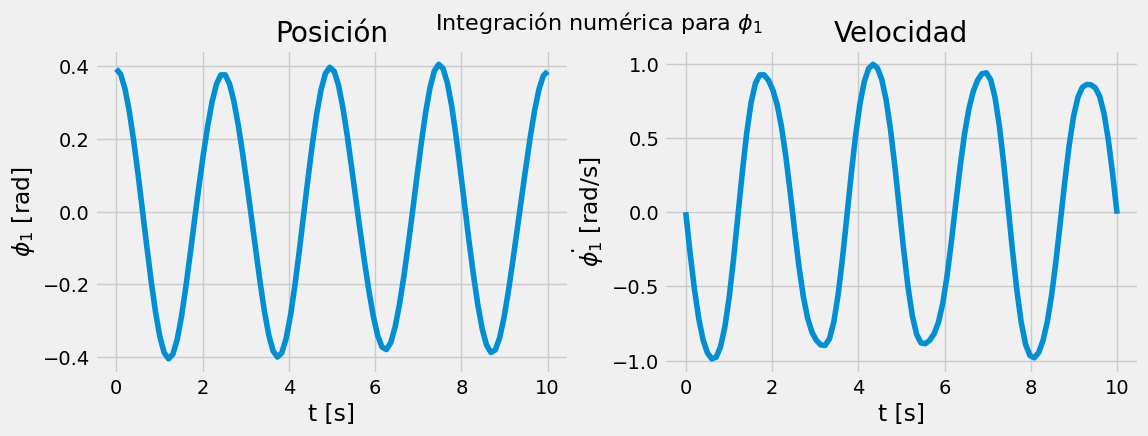

In [25]:
solucion = y_ode2
nombreCoordenada = '\phi_1'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[0]) # posición
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [rad]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [rad/s]', title='Velocidad')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{\\phi_2}$ [rad/s]'),
 Text(0.5, 1.0, 'Velocidad')]

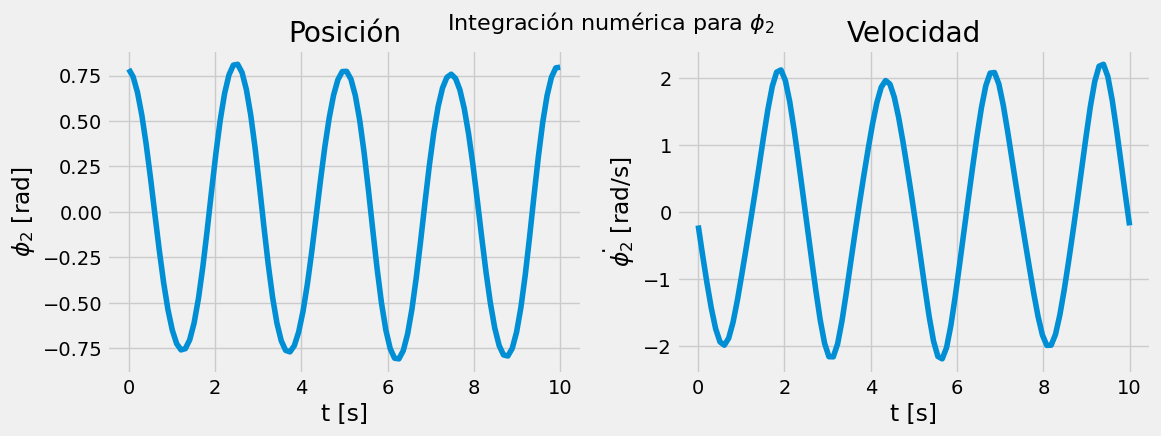

In [26]:
solucion = y_ode2
nombreCoordenada = '\phi_2'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[2]) # posición
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [rad]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[3]) # velocidad
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [rad/s]', title='Velocidad')